## Time Series EDA

In [1]:
# installing pandas data reader
#!pip install pandas-datareader

In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [2]:
#df_tesla = pdr.get_data_yahoo('TSLA')
df_tesla = pdr.data.DataReader('TSLA', data_source='stooq', start='2019-09-10', end='2024-01-09') # changed data source from yahoo to stooq. 

In [3]:
df_tesla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-01-09,238.11,238.9646,232.0400,234.96,96705664
2024-01-08,236.14,241.2500,235.3000,240.45,85166580
2024-01-05,236.86,240.1196,234.9001,237.49,92488939
2024-01-04,239.25,242.7000,237.7300,237.93,102629283
2024-01-03,244.98,245.6800,236.3200,238.45,121082599


In [4]:
df_tesla.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2019-09-16,16.4000,16.4953,16.0780,16.1873,70921440
2019-09-13,16.4640,16.5633,16.3243,16.3467,79697175
2019-09-12,16.5133,16.9000,16.2933,16.3913,128718150
2019-09-11,15.8253,16.5450,15.7333,16.4733,150641655
2019-09-10,15.3867,15.7027,15.2627,15.7027,73255710


<AxesSubplot: xlabel='Date'>

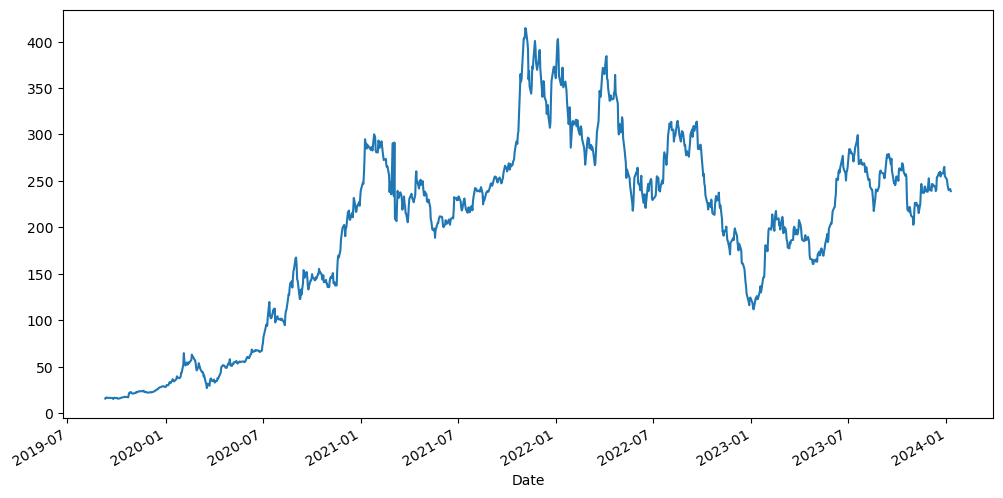

In [5]:
df_tesla['High'].plot(figsize=(12,6))

<AxesSubplot: xlabel='Date'>

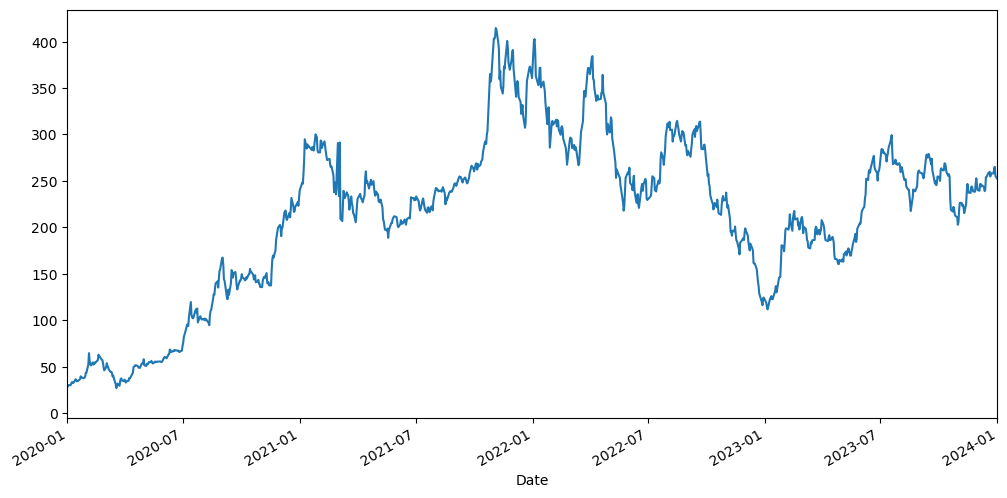

In [6]:
# put x limit and ylimit
df_tesla['High'].plot(xlim=['2020-01-01', '2024-01-01'], figsize=(12,6))

<AxesSubplot: xlabel='Date'>

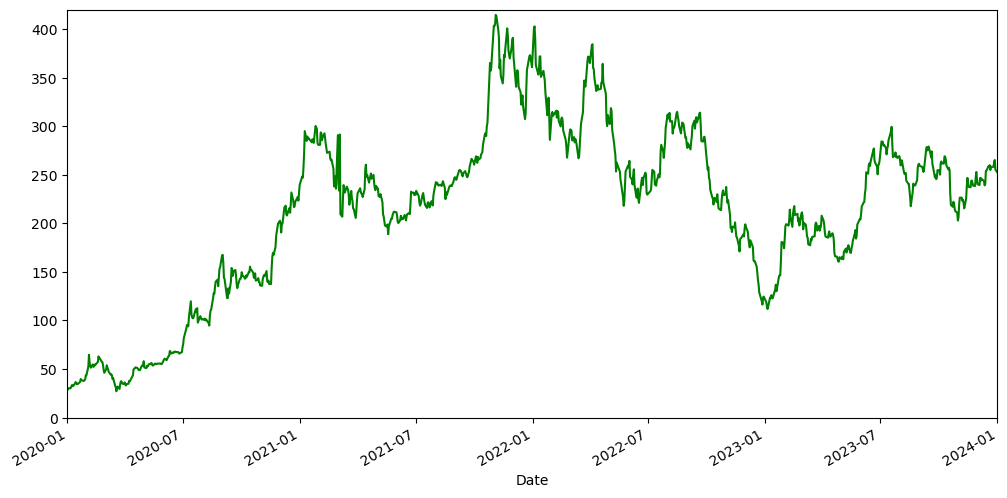

In [7]:
# put x limit and ylimit and coloring
df_tesla['High'].plot(xlim=['2020-01-01', '2024-01-01'], ylim=[0,420], figsize=(12,6), color='green')

In [8]:
# selecting limited data from entire dataset from '2020-01-01':'2021-01-01'
index = df_tesla.loc['2020-01-01':'2021-01-01'].index

C:\Users\dell\AppData\Local\Temp\ipykernel_20472\712827996.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  index = df_tesla.loc['2020-01-01':'2021-01-01'].index


In [9]:
#checking index data
index

DatetimeIndex(['2020-12-31', '2020-12-30', '2020-12-29', '2020-12-28',
               '2020-12-24', '2020-12-23', '2020-12-22', '2020-12-21',
               '2020-12-18', '2020-12-17',
               ...
               '2020-01-15', '2020-01-14', '2020-01-13', '2020-01-10',
               '2020-01-09', '2020-01-08', '2020-01-07', '2020-01-06',
               '2020-01-03', '2020-01-02'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None)

In [10]:
# out of selected data above select only one column out of that sample 
share_open = df_tesla.loc['2020-01-01':'2021-01-01']['Open']

C:\Users\dell\AppData\Local\Temp\ipykernel_20472\4123951535.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  share_open = df_tesla.loc['2020-01-01':'2021-01-01']['Open']


In [11]:
print(share_open)

Date
2020-12-31    233.3300
2020-12-30    224.0000
2020-12-29    220.3330
2020-12-28    224.8370
2020-12-24    214.3300
                ...   
2020-01-08     31.5800
2020-01-07     30.7600
2020-01-06     29.3647
2020-01-03     29.3667
2020-01-02     28.3000
Name: Open, Length: 253, dtype: float64


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

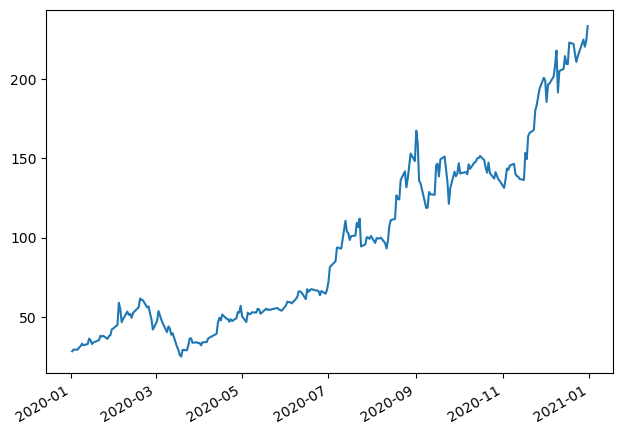

In [16]:
figure, axis = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate() # prevents axis data overlapping, see below tilted x axis values. 
axis.plot(index, share_open)

In [13]:
# date column as index previously but after below step moved to normal data column 
df_tesla = df_tesla.reset_index()

In [14]:
df_tesla.head() # date index changes to normal column

,Date,Open,High,Low,Close,Volume
0,2024-01-09,238.11,238.9646,232.0400,234.96,96705664
1,2024-01-08,236.14,241.2500,235.3000,240.45,85166580
2,2024-01-05,236.86,240.1196,234.9001,237.49,92488939
3,2024-01-04,239.25,242.7000,237.7300,237.93,102629283
4,2024-01-03,244.98,245.6800,236.3200,238.45,121082599


In [15]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1091 non-null   datetime64[ns]
 1   Open    1091 non-null   float64       
 2   High    1091 non-null   float64       
 3   Low     1091 non-null   float64       
 4   Close   1091 non-null   float64       
 5   Volume  1091 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 51.3 KB


In [16]:
# settting Date as set index
df_tesla=df_tesla.set_index('Date', drop=True)

In [17]:
df_tesla

,Open,High,Low,Close,Volume
Date,,,,,
2024-01-09,238.1100,238.9646,232.0400,234.9600,96705664
2024-01-08,236.1400,241.2500,235.3000,240.4500,85166580
2024-01-05,236.8600,240.1196,234.9001,237.4900,92488939
2024-01-04,239.2500,242.7000,237.7300,237.9300,102629283
2024-01-03,244.9800,245.6800,236.3200,238.4500,121082599
...,...,...,...,...,...
2019-09-16,16.4000,16.4953,16.0780,16.1873,70921440
2019-09-13,16.4640,16.5633,16.3243,16.3467,79697175
2019-09-12,16.5133,16.9000,16.2933,16.3913,128718150


In [18]:
# datetime
from datetime import datetime

In [19]:
datetime(2021, 11, 21)

datetime.datetime(2021, 11, 21, 0, 0)

In [20]:
datetime.now()

datetime.datetime(2024, 2, 25, 10, 43, 39, 554873)

## Time resampling 

In [21]:
# rule =A will get year end frequency data
df_tesla.resample(rule='A').max()

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-31,29.000,29.0207,28.4233,28.7293,450091365
2020-12-31,233.330,239.5730,230.3730,235.2230,914081370
2021-12-31,411.470,414.4970,405.6670,409.9700,268189377
2022-12-31,396.517,402.6670,378.6800,399.9270,221923313
2023-12-31,296.040,299.2900,289.5201,293.3400,306590613
2024-12-31,250.080,251.2500,244.4100,248.4200,121082599


<AxesSubplot: xlabel='Date'>

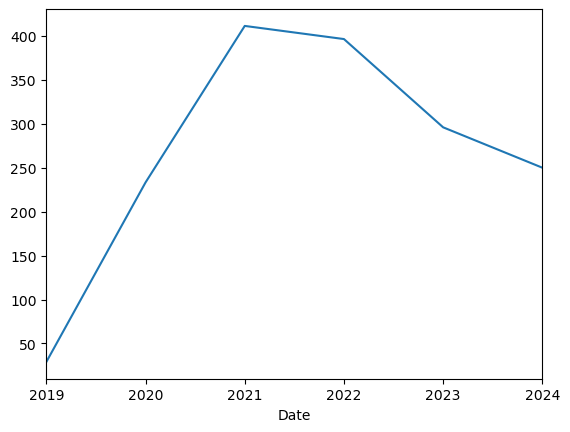

In [22]:
df_tesla.resample(rule='A').max()['Open'].plot()

In [23]:
# Quarterly start frequency
df_tesla.resample(rule='QS').max()

,Open,High,Low,Close,Volume
Date,,,,,
2019-07-01,16.5133,16.9000,16.3243,16.4733,194116680
2019-10-01,29.0000,29.0207,28.4233,28.7293,450091365
2020-01-01,61.5667,64.6000,60.0667,61.1600,914081370
2020-04-01,67.5200,72.5133,66.9167,71.9867,487977105
2020-07-01,167.3800,167.4970,156.8370,166.1070,584780430
2020-10-01,233.3300,239.5730,230.3730,235.2230,666378582
2021-01-01,297.1270,300.1330,290.5330,294.3630,268189377
2021-04-01,256.9000,260.2630,244.2020,254.1070,147052302
2021-07-01,262.4000,266.3330,258.3330,263.7870,100847295


<AxesSubplot: xlabel='Date'>

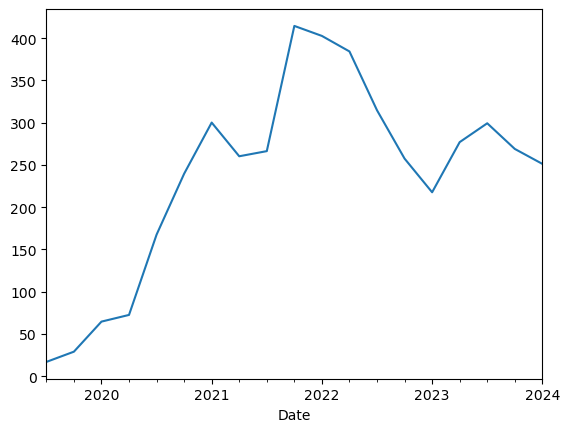

In [24]:
# Quarterly start frequency and plotting
df_tesla.resample(rule='QS').max()['High'].plot()

In [28]:
df_tesla['High'].rolling(5).max().head(20)

Date
2024-01-09       NaN
2024-01-08       NaN
2024-01-05       NaN
2024-01-04       NaN
2024-01-03    245.68
2024-01-02    251.25
2023-12-29    255.19
2023-12-28    265.13
2023-12-27    265.13
2023-12-26    265.13
2023-12-22    265.13
2023-12-21    265.13
2023-12-20    263.34
2023-12-19    259.84
2023-12-18    259.84
2023-12-15    259.84
2023-12-14    259.84
2023-12-13    258.74
2023-12-12    258.74
2023-12-11    254.13
Name: High, dtype: float64

In [29]:
df_tesla['Open: 30 days of rolling']=df_tesla['Open'].rolling(30).mean()

In [30]:
df_tesla.head()

,Open,High,Low,Close,Volume,Open: 30 days of rolling
Date,,,,,,
2024-01-09,238.11,238.9646,232.0400,234.96,96705664,NaN
2024-01-08,236.14,241.2500,235.3000,240.45,85166580,NaN
2024-01-05,236.86,240.1196,234.9001,237.49,92488939,NaN
2024-01-04,239.25,242.7000,237.7300,237.93,102629283,NaN
2024-01-03,244.98,245.6800,236.3200,238.45,121082599,NaN


<AxesSubplot: xlabel='Date'>

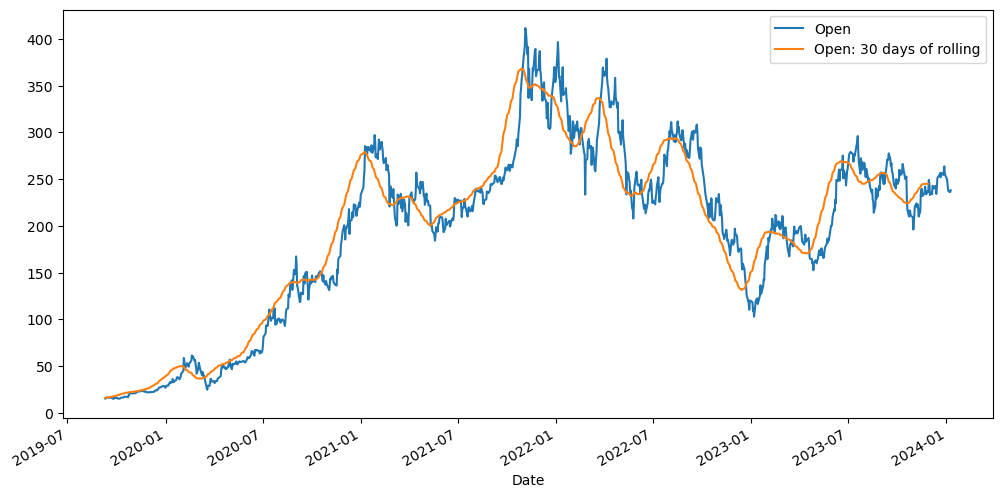

In [31]:
# rolling function will make smoothning as you can see in below graph. 
df_tesla[['Open','Open: 30 days of rolling' ]].plot(figsize=(12,6))